In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as py
import plotly.offline as pyo
from plotly.offline import iplot
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import colorlover as cl
from IPython.display import HTML
HTML(cl.to_html( cl.scales ))

android = pd.read_csv("googleplaystore.csv")
android.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [2]:
android.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [3]:
android=android.drop(['Current Ver', 'Android Ver'],1)
android.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [4]:
# Number of rows:

len(android)


10841

In [5]:
#Number of columns:
len(android.columns)

11

In [6]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
dtypes: float64(1), object(10)
memory usage: 508.2+ KB


In [7]:
android.shape

(10841, 11)

### We can see below examples of duplicated rows 

In [8]:
android[android.duplicated(subset="App")].head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018"
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018"
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018"
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018"
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018"
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018"
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018"
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018"
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018"
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018"


In [9]:
android[android["App"] == "Google Ads"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
238,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018"
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018"
4979,Google Ads,BUSINESS,4.3,29331,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018"


In [10]:
android[android["App"] == "Google Allo"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
401,Google Allo,COMMUNICATION,4.3,346982,Varies with device,"10,000,000+",Free,0,Everyone,Communication,"January 23, 2018"
410,Google Allo,COMMUNICATION,4.3,346980,Varies with device,"10,000,000+",Free,0,Everyone,Communication,"January 23, 2018"
5609,Google Allo,COMMUNICATION,4.3,347086,Varies with device,"10,000,000+",Free,0,Everyone,Communication,"January 23, 2018"


In [11]:
len(android[android.duplicated(subset="App")])

1181

In [12]:
android.duplicated().sum()

483

In [13]:
android.loc[android.duplicated(), :]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018"
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018"
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018"
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018"
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018"
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018"
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018"
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018"


In [14]:
android.App.duplicated().sum()

1181

In [15]:
#Decide to drop duplicates from App column
android = android.drop_duplicates(subset = "App", keep = "first")

In [16]:
android.shape

(9660, 11)

In [17]:
#Check missing data
android.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

In [18]:
#Decide to fill nan values with "o" at column Rating
android.Rating.fillna(0, inplace=True)


In [19]:
android.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
dtype: int64

In [20]:
#Check the Type column for nan values
android[android['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
9148,Command & Conquer: Rivals,FAMILY,0.0,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018"


In [21]:
android['Type'].value_counts()

Free    8902
Paid     756
0          1
Name: Type, dtype: int64

#### We can see we have 2 types : free and paid so by mistake only one row is without value so we modify to free because price=0


In [22]:
android.iloc[9148]   # to see the entire row : android.iloc[9148:9149]

App               Fire Emblem Heroes
Category                      FAMILY
Rating                           4.6
Reviews                       407694
Size              Varies with device
Installs                  5,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                    Simulation
Last Updated           July 19, 2018
Name: 10319, dtype: object

In [23]:
android.loc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                    0
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                    NaN
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Name: 9148, dtype: object

In [24]:
android['Type'][9148]='Free'

In [25]:
#Check again if the code worked.
android.loc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                    0
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Name: 9148, dtype: object

#### I decided to drop the row with index 10472 because it's inserted incorrectly.

In [26]:
android.drop(index=10472, axis=0, inplace=True)

In [27]:
#Check to see the row again
android.iloc[10472:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


In [28]:
android.shape

(9659, 11)

In [29]:
# see again if we have nan values in the columns
android.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [30]:
android.Rating = android.Rating.astype(float)

In [31]:
print("Range: ", android.Rating.min(),"-",android.Rating.max())

Range:  0.0 - 5.0


A lot of ratings are between 4.0 and 5.0

Next the REVIEW column to analyze

In [32]:
android.Reviews.str.isnumeric().sum()

9659

In [33]:
android.Reviews = android.Reviews.astype(float)

In [34]:
android.Reviews.dtype

dtype('float64')

In [35]:
android.Size.value_counts()

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
885k                     1
714k                     1
647k                     1
663k                     1
169k                     1
Name: Size, Length: 461, dtype: int64

In [36]:
# It can be seen that data has metric prefixes (Kilo and Mega) along with another string. 
#Replacing k and M with their values to convert values to numeric.

android.Size = android.Size.replace("Varies with device",np.nan)
android.Size = android.Size.str.replace("M","000000")
android.Size = android.Size.str.replace("k","000")

In [37]:
android.Size = android.Size.replace("1,000+",1000)

In [38]:
android.Size = android.Size.astype(float)

Text(0, 0.5, 'Frequency')

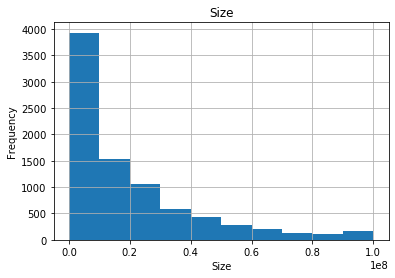

In [39]:
android.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

In [40]:
android.Installs.value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [41]:
android.Installs = android.Installs.str.replace(",","")
#android.Installs = android.Installs.apply(lambda x: x.strip("+"))
android.Installs = android.Installs.str.replace("+","")
android.Installs.value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [42]:
android.Installs.str.isnumeric().sum()

9659

In [43]:
android.Type.value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

In [44]:
android.Price = android.Price.str.replace("$","")

In [45]:
android.Price.value_counts()

0        8903
0.99      145
2.99      124
1.99       73
4.99       70
         ... 
9.00        1
3.61        1
1.04        1
3.90        1
15.46       1
Name: Price, Length: 92, dtype: int64

In [46]:
android.Price = android.Price.astype(float)

In [47]:
android.Rating = android.Rating.astype(float)

In [48]:
android["Content Rating"].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [49]:
android.Genres.value_counts()

Tools                                  826
Entertainment                          561
Education                              510
Business                               420
Medical                                395
                                      ... 
Health & Fitness;Action & Adventure      1
Strategy;Education                       1
Adventure;Brain Games                    1
Communication;Creativity                 1
Art & Design;Action & Adventure          1
Name: Genres, Length: 118, dtype: int64

In [50]:
android.reset_index(inplace=True)
android.tail()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017"
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018"
9656,10838,Parkinson Exercices FR,MEDICAL,0.0,3.0,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017"
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015"
9658,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,19000000.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018"


In [51]:
android.Category.value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

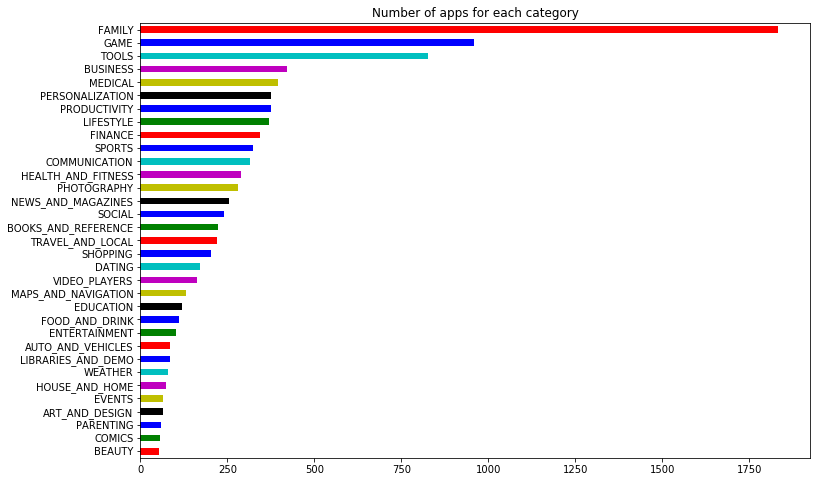

In [52]:
android.Category.value_counts().sort_values().plot(kind='barh', color=list('rgbkymcb'), figsize= (12,8))
plt.title("Number of apps for each category")
plt.savefig("Category1.png")

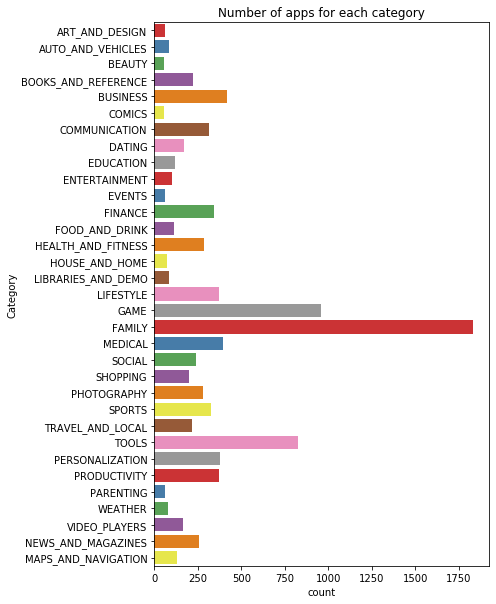

In [53]:
# plot of Category with seaborn  
#we can change figsize=(20,10) for other view, but (6,10) is perfect for y axis "Category"
plt.figure(figsize=(6,10))
sns.countplot(y="Category",data=android, palette = "Set1")
plt.title("Number of apps for each category")
plt.savefig("Category2.png")

#### Examples of applications with maximum rating of 5.0  

#### Table below shows that this apps are from categories like Family, Lifestyle, Medical, Business

In [54]:
temp=android.Rating.apply(lambda x: True if x==5.0 else False)
android[temp]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
293,329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37000000.0,1000,Free,0.0,Everyone,Comics,"June 26, 2018"
511,612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018"
514,615,Awake Dating,DATING,5.0,2.0,70000000.0,100,Free,0.0,Mature 17+,Dating,"July 24, 2018"
532,633,Spine- The dating app,DATING,5.0,5.0,9.3,500,Free,0.0,Teen,Dating,"July 14, 2018"
535,636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0,100,Free,0.0,Mature 17+,Dating,"August 1, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...
9542,10721,Mad Dash Fo' Cash,GAME,5.0,14.0,16000000.0,100,Free,0.0,Everyone,Arcade,"June 19, 2017"
9562,10742,GKPB FP Online Church,LIFESTYLE,5.0,32.0,7.9,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017"
9594,10776,Monster Ride Pro,GAME,5.0,1.0,24000000.0,10,Free,0.0,Everyone,Racing,"March 5, 2018"
9638,10820,Fr. Daoud Lamei,FAMILY,5.0,22.0,8.6,1000,Free,0.0,Teen,Education,"June 27, 2018"


In [55]:
android[["Category", "Rating"]][android.Rating == 5.0 ].groupby("Category").count().sort_values(by="Rating", ascending=False)

,Rating
Category,
FAMILY,67
LIFESTYLE,29
MEDICAL,25
BUSINESS,18
TOOLS,17
GAME,12
HEALTH_AND_FITNESS,12
PERSONALIZATION,10
SOCIAL,8


### REVIEWS and RATING - Visualization in many styles 

#### The maximum number of reviews in each category.

In [56]:
android[["Category", "App", "Reviews"]].groupby("Category").max().sort_values(by="Reviews", ascending=False)

,App,Reviews
Category,,
SOCIAL,"💘 WhatsLov: Smileys of love, stickers and GIF",78158306.0
COMMUNICATION,哈哈姆特不EY,69119316.0
GAME,► MultiCraft ― Free Miner! 👍,44891723.0
TOOLS,📏 Smart Ruler ↔️ cm/inch measuring for homework!,42916526.0
VIDEO_PLAYERS,"뽕티비 - 개인방송, 인터넷방송, BJ방송",25655305.0
NEWS_AND_MAGAZINES,أحداث وحقائق | خبر عاجل في اخبار العالم,11667403.0
PHOTOGRAPHY,love,10858556.0
FAMILY,英漢字典 EC Dictionary,10053186.0
TRAVEL_AND_LOCAL,trivago: Hotels & Travel,9235155.0


#### Observations: Apps with the highest number of reviews are from Social, Communication, Game and Tools.

In [57]:
rev = android[android.Reviews > 7000000.0].sort_values(by="Reviews", ascending=False)
rev

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2002,2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018"
300,336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018"
2003,2545,Instagram,SOCIAL,4.5,66577313.0,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018"
299,335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018"
1372,1670,Clash of Clans,GAME,4.6,44891723.0,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018"
3181,4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526.0,NaN,500000000,Free,0.0,Everyone,Tools,"August 3, 2018"
1356,1654,Subway Surfers,GAME,4.5,27722264.0,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018"
2908,3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018"
6486,7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999.0,NaN,500000000,Free,0.0,Everyone,Tools,"August 4, 2018"
1362,1660,Clash Royale,GAME,4.6,23133508.0,97000000.0,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018"


#### Above we can see apps with the highest number of reviews such as Facebook, WhatsApp Messenger, Instagram, Messenger, Clash of Clans and below is a visualization of the results.

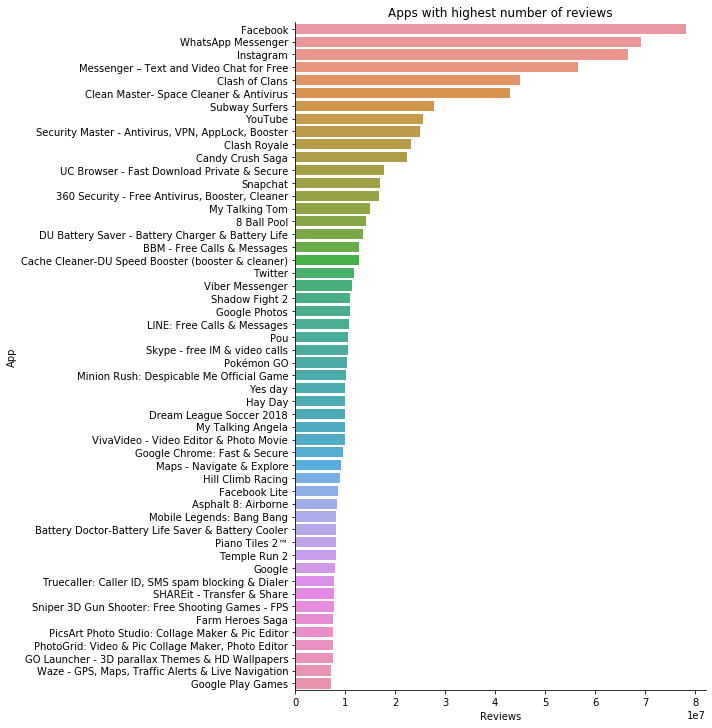

<Figure size 432x288 with 0 Axes>

In [58]:
sns.catplot(x="Reviews", y="App", data=rev, kind="bar", height=10)
plt.title("Apps with highest number of reviews")
plt.show()
plt.savefig("Max_reviews.png")

We can see here apps like Facebook, WhatsApp, Instagram, Messenger have the most reviews.

### Reviews vs.Rating 

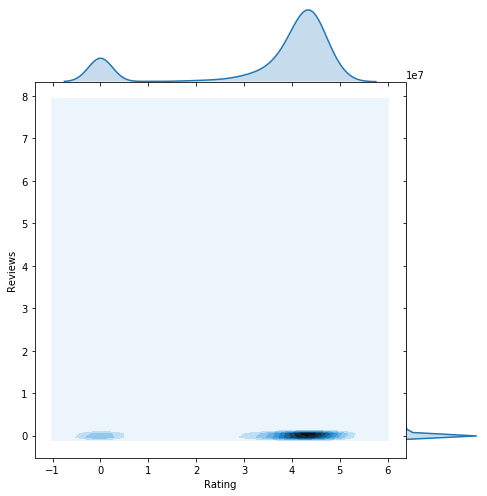

In [59]:
# Show the joint distribution using kernel density estimation
sns.jointplot(android.Rating,android.Reviews, kind="kde", height=7, space=0)
plt.show()

Text(0.5, 1.0, 'Distribution of Reviews')

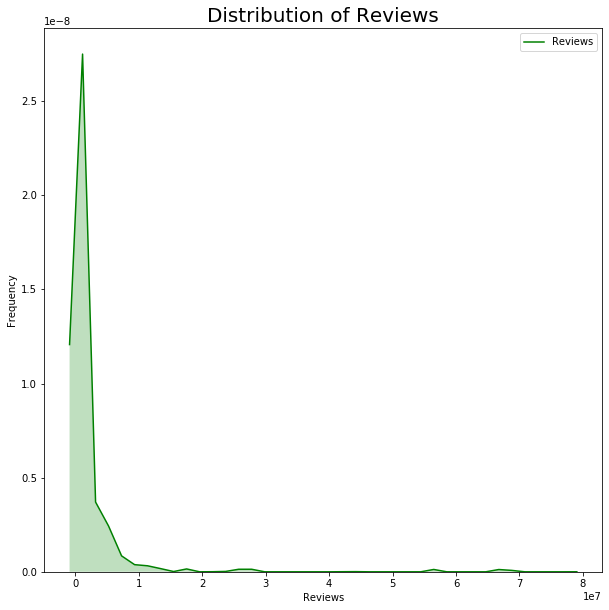

In [60]:
#sns.set(font_scale=1) - for increasing the scale
plt.figure(figsize=(10,10))
g = sns.kdeplot(android.Reviews, color="Green", shade = True, gridsize=40)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reviews', size=20)


Text(0.5, 1.0, 'Rating VS Reviews')

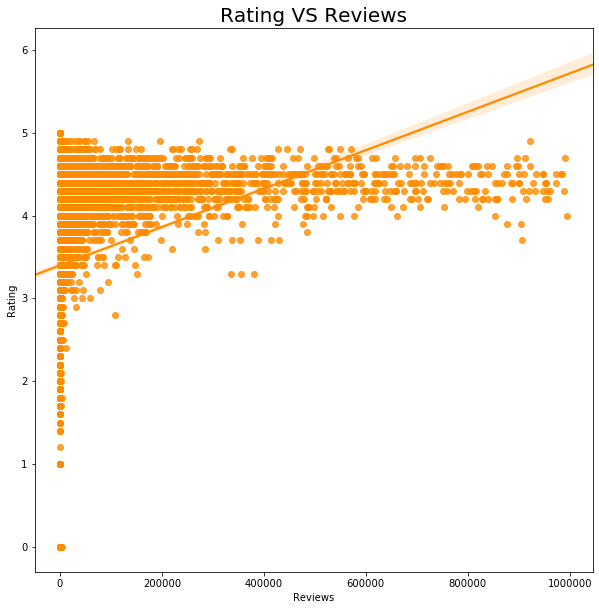

In [61]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=android[android['Reviews']<1000000]);
plt.title('Rating VS Reviews',size = 20)

# Seem like well-known application will get a good rating

Text(0.5, 1.0, 'Rating vs Reviews')

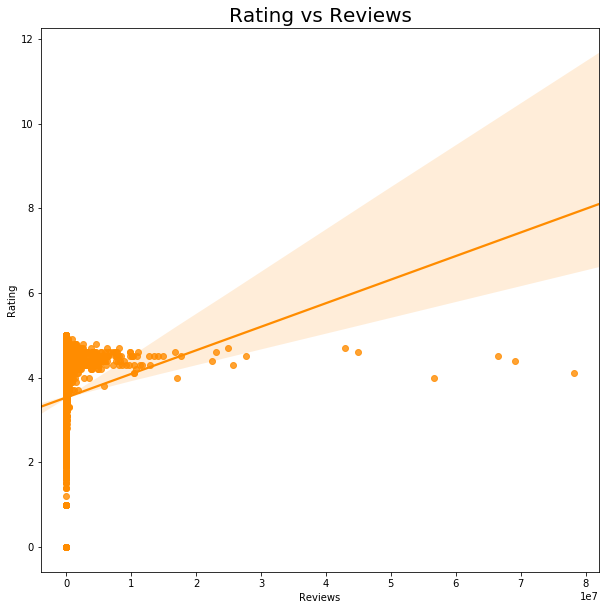

In [62]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=android);
plt.title('Rating vs Reviews',size = 20)

Text(0.5, 1, 'Rating vs Reviews')

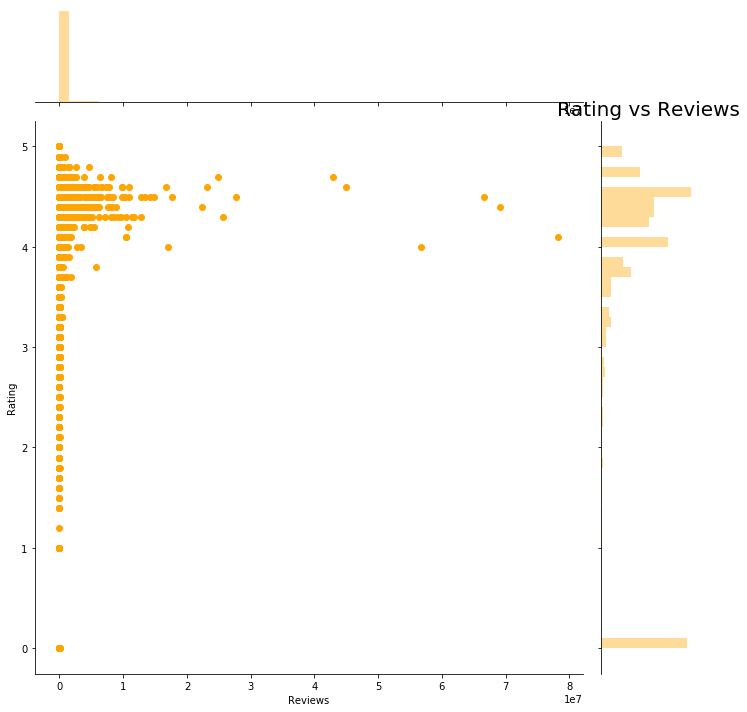

In [63]:
sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=android, height=10)
plt.title('Rating vs Reviews', size = 20)

#### As the number of reviews increases, the average ratings of the apps get affected.
#### Higher the number of reviews, more likely the apps will have an average rating above 4.0.
#### There are exceptions too. The graph shows that some apps, which have recieved low number of reviews, have an average rating 5.0.

### Rating vs.Price

Text(0, 0.5, 'Price')

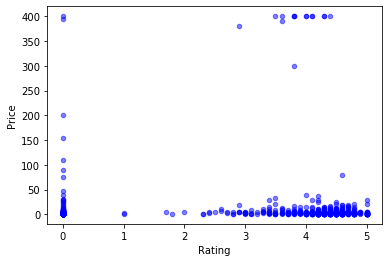

In [64]:
# We analyze free and paid apps
free = android[android.Type == "Free"]
paid = android[android.Type == "Paid"]
android.Price = android.Price.astype(float)
android.Rating = android.Rating.astype(float)

paid.plot(kind = "scatter", x = "Rating", y = "Price", alpha = .5, color = "b")
plt.xlabel("Rating")
plt.ylabel("Price")


Text(0.5, 1.0, 'Rating vs Price')

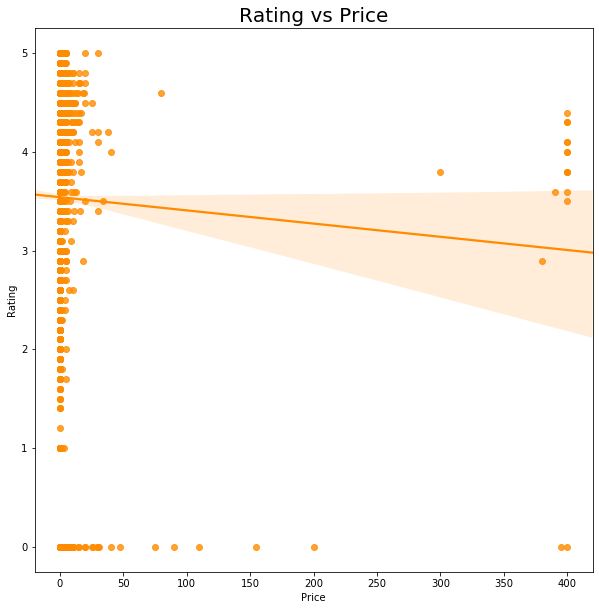

In [65]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=android);
plt.title('Rating vs Price',size = 20)

Text(0.5, 1.0, 'Rating vs Price')

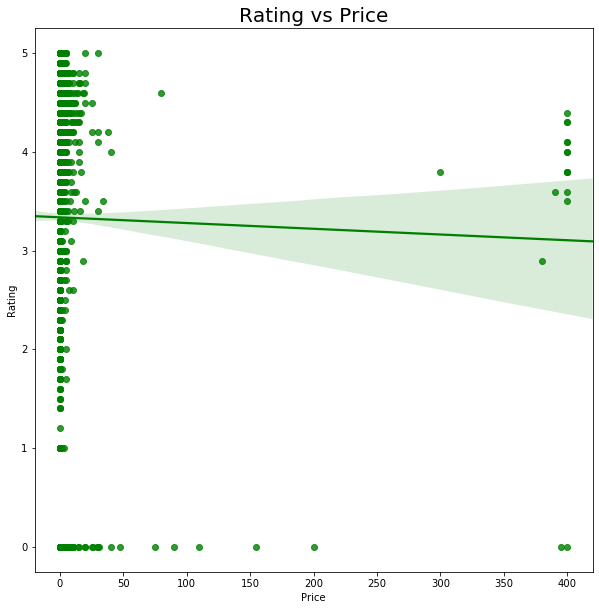

In [66]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'green',data=android[android['Reviews']<50000]);
plt.title('Rating vs Price',size = 20)

#### Higher price application may make customer disappointed, if they are not good enough.

### RATING 

Text(0.5, 1.0, 'Rating of Distribution')

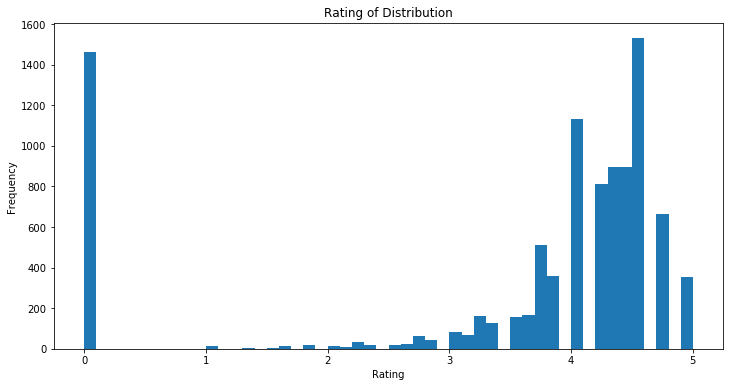

In [67]:
android.Rating.plot(kind = "hist", bins = 50, figsize = (12,6))
plt.xlabel("Rating")
plt.title("Rating of Distribution")

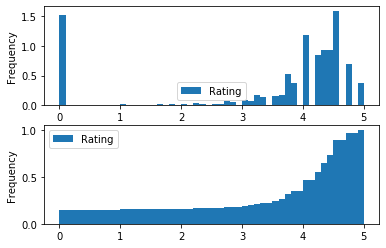

In [68]:
fig,axes = plt.subplots(nrows = 2, ncols = 1)
android.plot(kind = "hist", y = "Rating", bins =50, range = (0,5), density = True, ax = axes[0])
android.plot(kind = "hist", y = "Rating", bins =50, range = (0,5), density = True, ax = axes[1], cumulative = True)

Text(0, 0.5, 'Frequency')

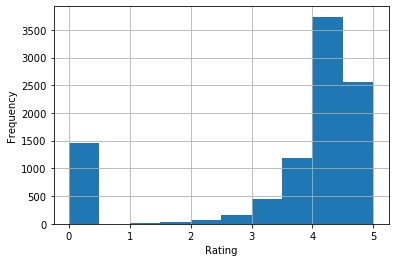

In [69]:
android.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

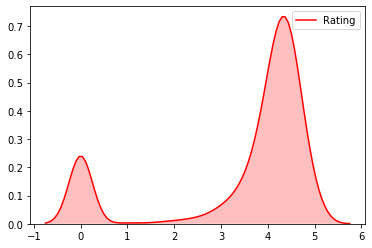

In [70]:
# Rating distribution with seaborn 

android.Rating.value_counts()

android.Rating = android.Rating.astype(float)
android.Rating.dtype
sns.kdeplot(android.Rating, shade=True, color="r")

Text(0.5, 1.0, 'Rating Distribution')

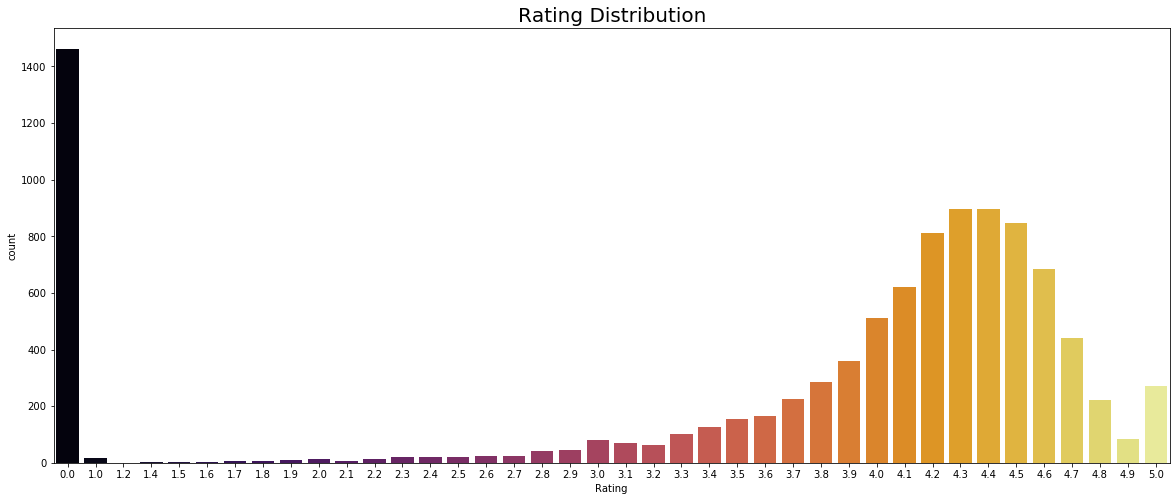

In [71]:
plt.figure(figsize = (20,8))
sns.countplot(x="Rating",data=android, palette = "inferno")
plt.title('Rating Distribution',size = 20)

#### A lot of ratings are between 4.0 and 5.0

### PRICE DISTRIBUTION

Text(0.5, 1.0, 'Number of apps for every price')

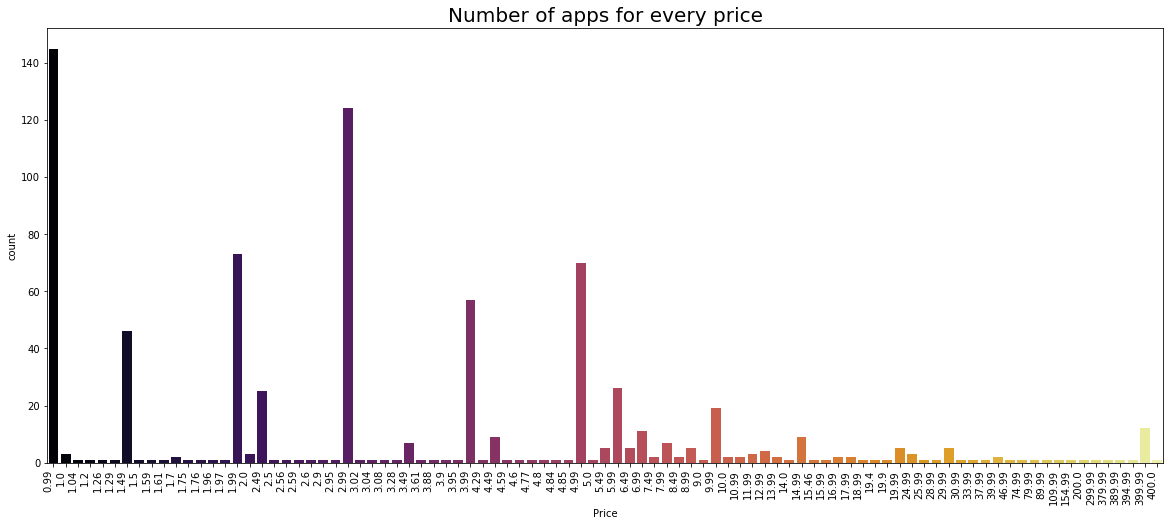

In [72]:
plt.figure(figsize = (20,8))
priced_apps=android[android['Price'] != 0.0]
price_plot = sns.countplot(priced_apps['Price'], palette = "inferno")
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
price_plot 
plt.title('Number of apps for every price',size = 20)

In [73]:
android["Content Rating"].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [74]:
cont_rat = android[["Category", "Content Rating"]].groupby(["Category","Content Rating"]).size().head(55)
cont_rat

Category             Content Rating 
ART_AND_DESIGN       Everyone             60
                     Everyone 10+          1
                     Teen                  3
AUTO_AND_VEHICLES    Everyone             83
                     Everyone 10+          1
                     Teen                  1
BEAUTY               Everyone             45
                     Everyone 10+          2
                     Mature 17+            3
                     Teen                  3
BOOKS_AND_REFERENCE  Everyone            198
                     Everyone 10+          4
                     Mature 17+            3
                     Teen                 17
BUSINESS             Everyone            405
                     Everyone 10+          1
                     Mature 17+            1
                     Teen                 13
COMICS               Adults only 18+       2
                     Everyone             26
                     Everyone 10+          3
                  

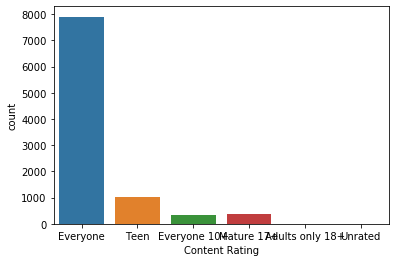

In [75]:
sns.countplot(x='Content Rating', data=android)

In [76]:
cont_rat = cont_rat.to_frame().reset_index()
cont_rat.head()

,Category,Content Rating,0
0,ART_AND_DESIGN,Everyone,60
1,ART_AND_DESIGN,Everyone 10+,1
2,ART_AND_DESIGN,Teen,3
3,AUTO_AND_VEHICLES,Everyone,83
4,AUTO_AND_VEHICLES,Everyone 10+,1


In [77]:
cont_rat.columns

Index(['Category', 'Content Rating', 0], dtype='object')

In [78]:
cont_rat = cont_rat.rename({0: 'Num'}, axis=1)
cont_rat.head()

,Category,Content Rating,Num
0,ART_AND_DESIGN,Everyone,60
1,ART_AND_DESIGN,Everyone 10+,1
2,ART_AND_DESIGN,Teen,3
3,AUTO_AND_VEHICLES,Everyone,83
4,AUTO_AND_VEHICLES,Everyone 10+,1


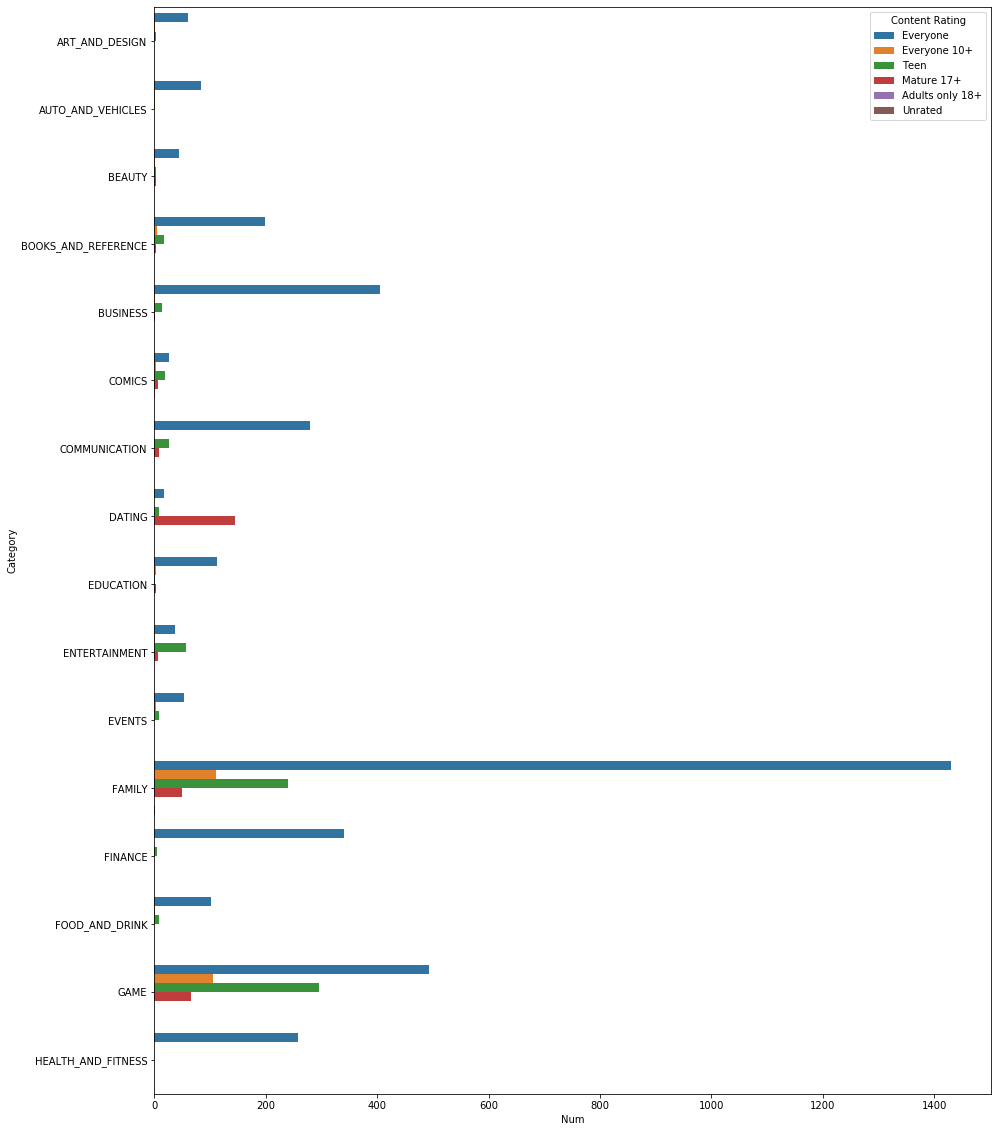

In [79]:
plt.figure(figsize=(15,20))
sns.barplot(data=cont_rat, x="Num", y="Category", hue="Content Rating")
plt.savefig("Category_Content_Rating1.png")

In [80]:
df1= android.copy()

df1["Content Rating"]=df1["Content Rating"].replace(to_replace=['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+', 'Adults only 18+', 'Unrated'], value=[1,2,3,4,5,6])
df1["Content Rating"].dtype
df2 = df1[["Category", "Content Rating"]]
df2

,Category,Content Rating
0,ART_AND_DESIGN,1
1,ART_AND_DESIGN,1
2,ART_AND_DESIGN,1
3,ART_AND_DESIGN,3
4,ART_AND_DESIGN,1
...,...,...
9654,FAMILY,1
9655,FAMILY,1
9656,MEDICAL,1
9657,BOOKS_AND_REFERENCE,4


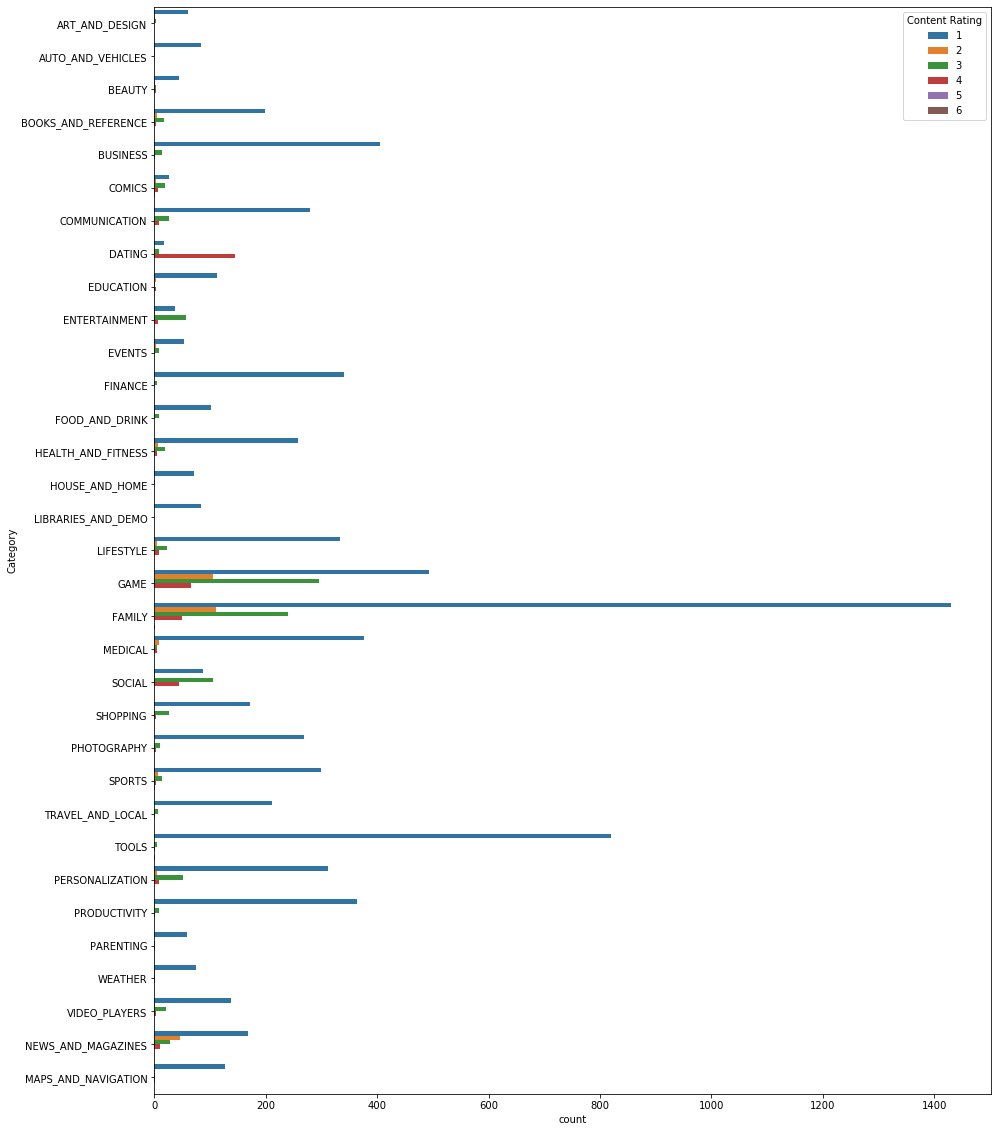

In [81]:
plt.figure(figsize=(15,20))
#sns.swarmplot(data=df2, y="Category", hue="Content Rating") --> it is blocking the jupyter
sns.countplot(data=df2, y="Category", hue="Content Rating")
plt.savefig("Category_Content_Rating2.png")

In [82]:
df3 = pd.crosstab(index=android["Category"],columns=android["Content Rating"])
df3 = df3[["Everyone", "Everyone 10+", "Teen", "Mature 17+", "Adults only 18+", "Unrated"]]
df3.head()

Content Rating,Everyone,Everyone 10+,Teen,Mature 17+,Adults only 18+,Unrated
Category,,,,,,
ART_AND_DESIGN,60,1,3,0,0,0
AUTO_AND_VEHICLES,83,1,1,0,0,0
BEAUTY,45,2,3,3,0,0
BOOKS_AND_REFERENCE,198,4,17,3,0,0
BUSINESS,405,1,13,1,0,0


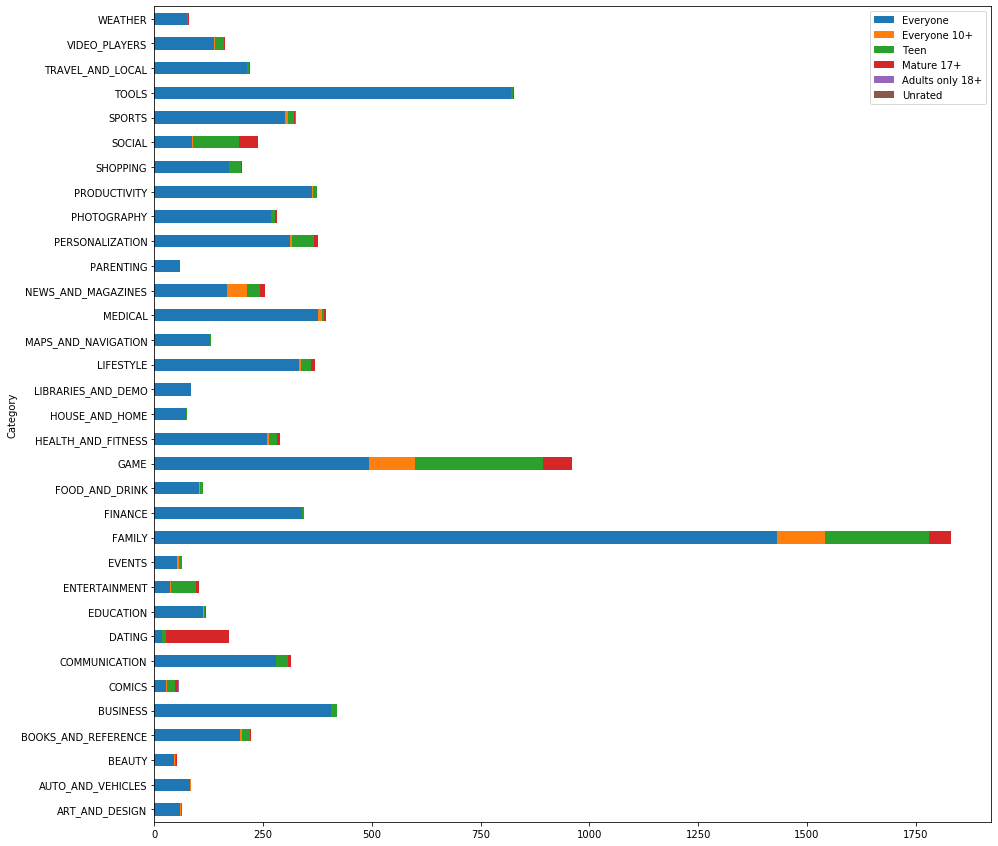

In [83]:
df3.plot(kind="barh", figsize=(15,15),stacked=True)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.savefig("Category_Content_Rating3.png")

In [84]:
df3.columns

Index(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+', 'Adults only 18+',
       'Unrated'],
      dtype='object', name='Content Rating')

In [85]:
df3.index

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

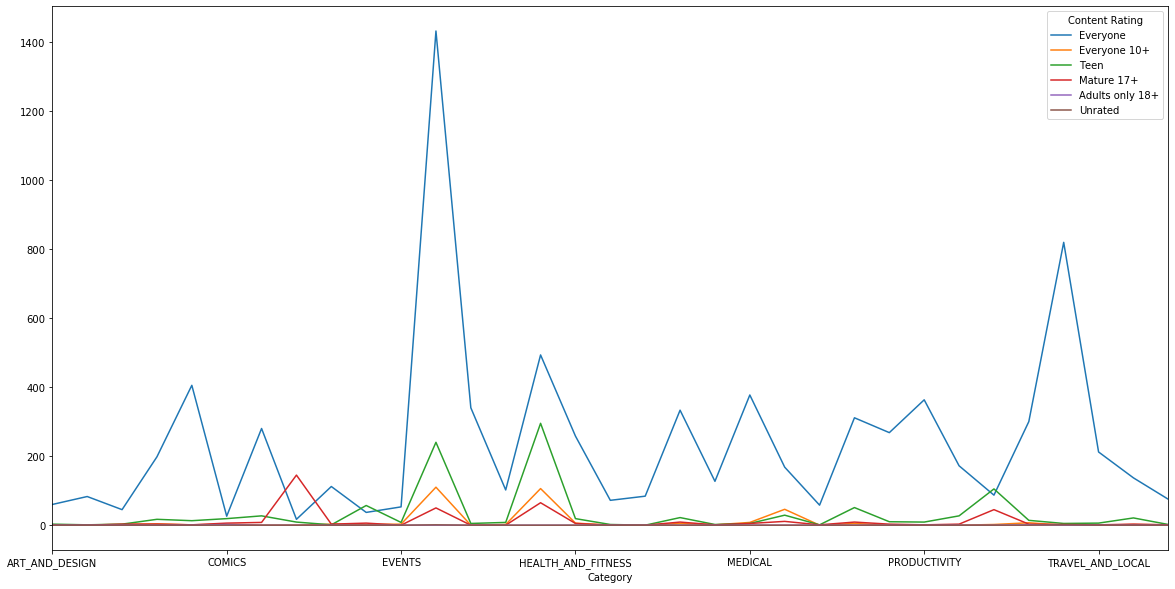

In [86]:
df3.plot( y=df3.columns, kind = 'line', figsize=(20,10))
plt.savefig("Category_Content_Rating4.png")

In [87]:
free = android[android.Type == "Free"]
paid = android[android.Type == "Paid"]

# We can comprasion free and paid app reviews
#android.pie.plot(x="Type")

<Figure size 1440x1440 with 0 Axes>

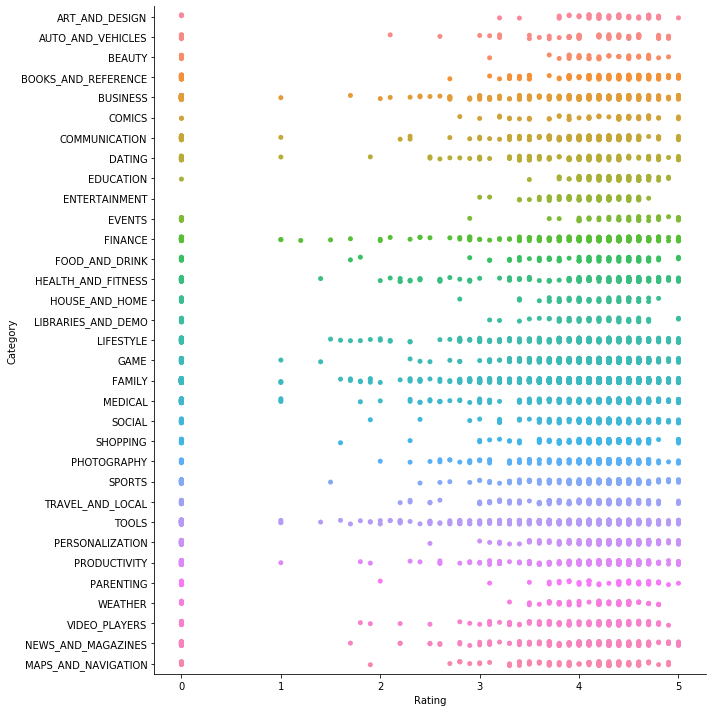

In [88]:
plt.figure(figsize=(20,20))
sns.catplot(x="Rating",y="Category", data=android, height=10)
plt.savefig("Category_Rating1.png")

<Figure size 432x1440 with 0 Axes>

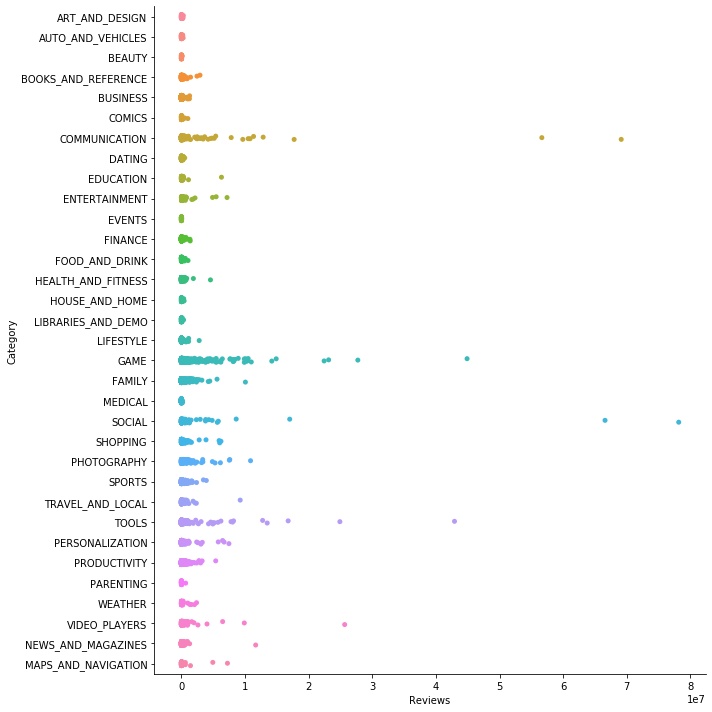

In [89]:
plt.figure(figsize=(6,20))
sns.catplot(x="Reviews",y="Category", data=android, height=10)
plt.savefig("Category_Reviews1.png")

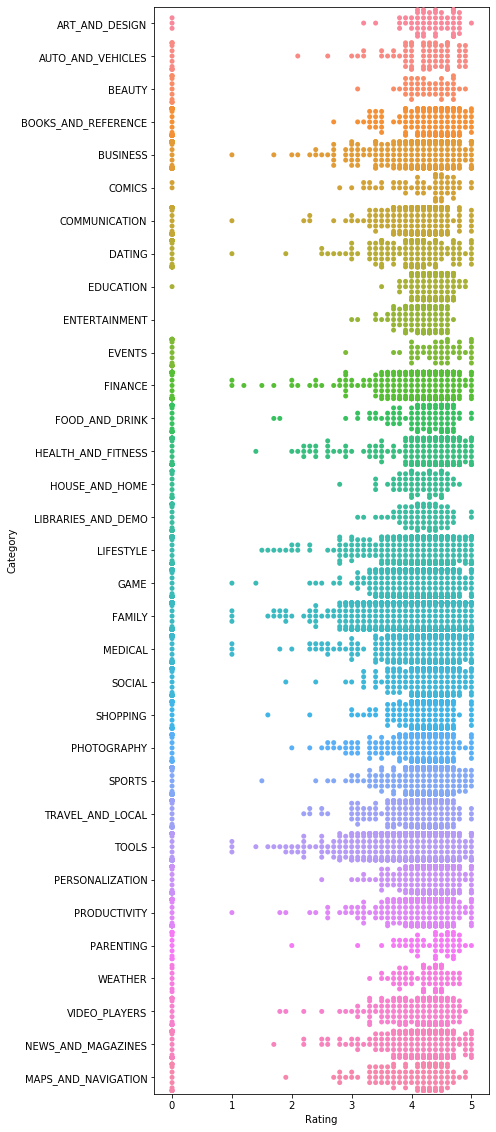

In [90]:
plt.figure(figsize=(6,20))
sns.swarmplot(x="Rating",y="Category", data=android)
plt.savefig("Category_Rating2.png")

#### Rating of applications in each category is not different too much, mostly between 4.00 and 5.00

Text(0.5, 1.0, 'Content Raiting')

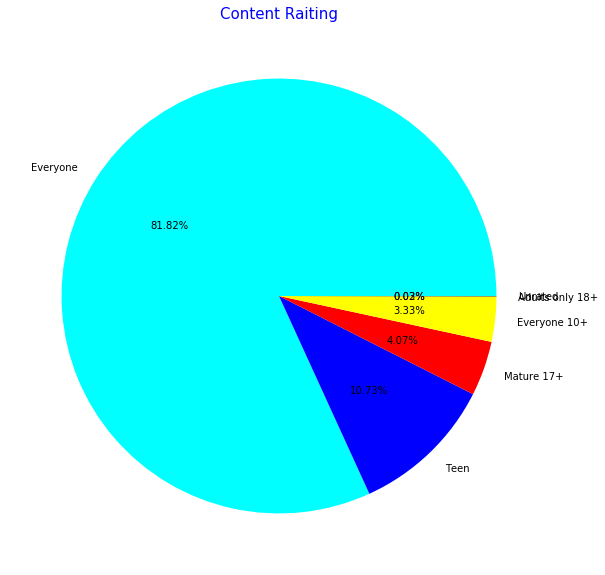

In [91]:
labels = android["Content Rating"].value_counts().index
colors = ['cyan','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = android["Content Rating"].value_counts().values


# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Content Raiting',color = 'blue',fontsize = 15)

Text(0.5, 1.0, 'Content Rating vs Price')

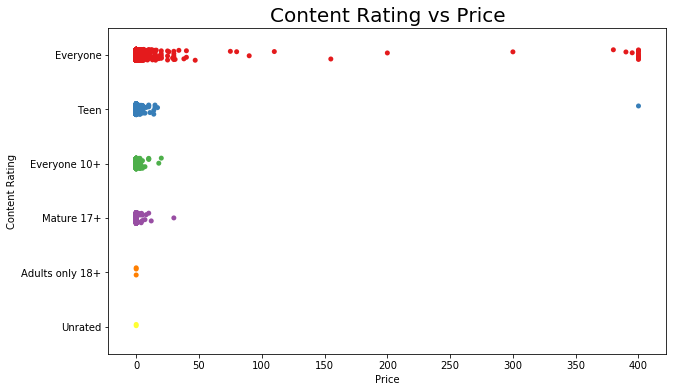

In [92]:
plt.figure(figsize=(10,6))
sns.stripplot(y="Content Rating",x="Price", data=android, palette = "Set1")
plt.title('Content Rating vs Price',size = 20)

#### Most of the Apps with Content Rating = EVERYONE lie below 50 dollars. However there are some apps that lie in the 350-400 dollars bracket!!           
#### The mature rated apps(10+, 17+, 18+) are mosty free or cheap.

Text(0.5, 1.0, 'Type')

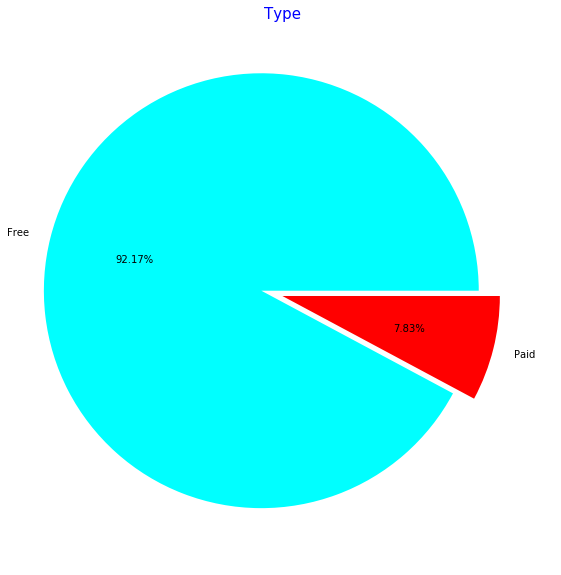

In [93]:
labels = android["Type"].value_counts().index
colors = ['cyan','red']
explode = [0.1,0]      # explode 1st slice
sizes = android["Type"].value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Type',color = 'blue',fontsize = 15)


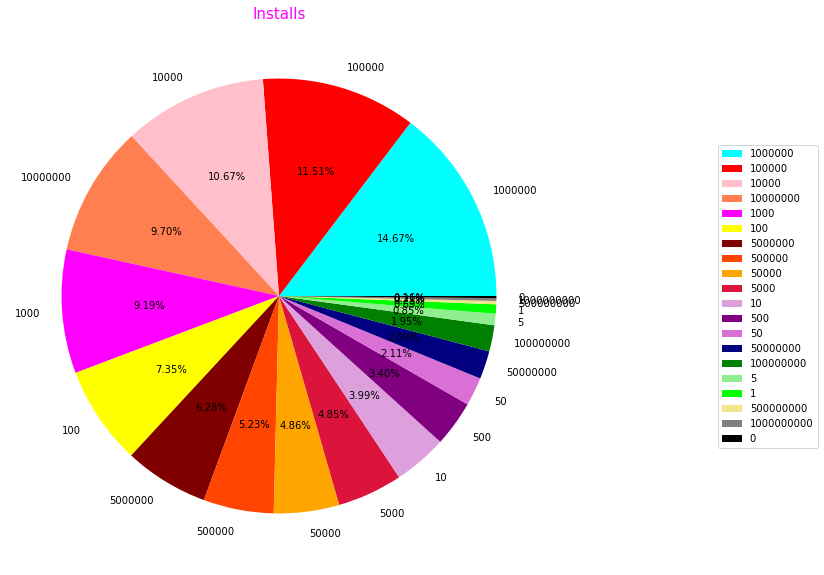

In [94]:
labels = android["Installs"].value_counts().index
colors = ['cyan','red','pink', 'coral', 'fuchsia', 'yellow', 'maroon', 'orangered', 'orange', 'crimson', 
          'plum', 'purple', 'orchid', 'navy', 'green', 'lightgreen', 'lime', 'khaki', 'grey', 'black']
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sizes = android["Installs"].value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Installs',color = 'magenta',fontsize = 15)
plt.legend(labels, loc=5,  bbox_to_anchor=(1.5, 0.5))


Text(0.5, 1.0, 'Installs count distribution')

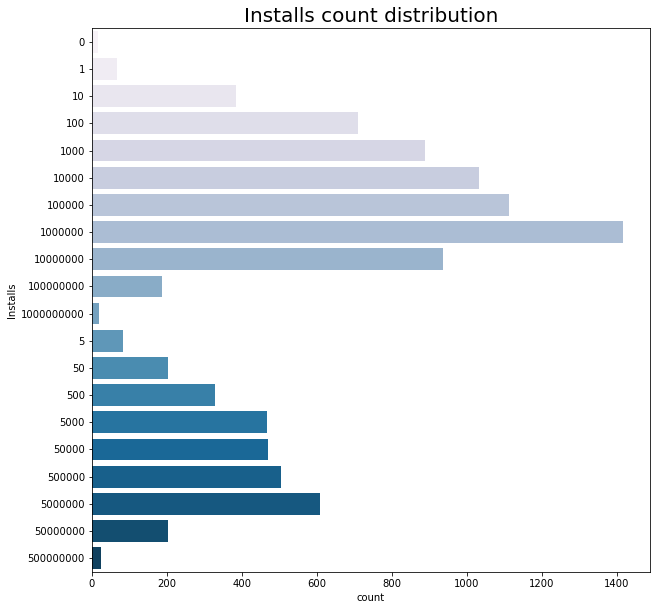

In [95]:
plt.figure(figsize=(10,10))
sns.countplot(y="Installs",data=android, palette = "PuBu")
plt.title('Installs count distribution',size = 20)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '100'),
 Text(0, 0, '1000'),
 Text(0, 0, '10000'),
 Text(0, 0, '100000'),
 Text(0, 0, '1000000'),
 Text(0, 0, '10000000'),
 Text(0, 0, '100000000'),
 Text(0, 0, '1000000000'),
 Text(0, 0, '5'),
 Text(0, 0, '50'),
 Text(0, 0, '500'),
 Text(0, 0, '5000'),
 Text(0, 0, '50000'),
 Text(0, 0, '500000'),
 Text(0, 0, '5000000'),
 Text(0, 0, '50000000'),
 Text(0, 0, '500000000')]

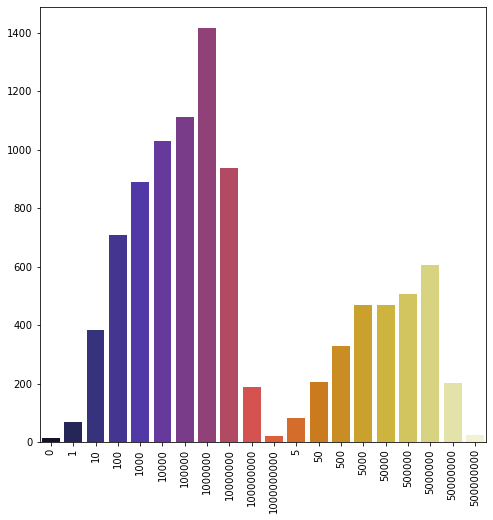

In [96]:
plt.figure(figsize=(8,8))
b=sns.barplot(x=android.Installs.value_counts().index.values,y=android.Installs.value_counts().values ,palette="CMRmap")
b.set_xticklabels(b.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Installs count distribution')

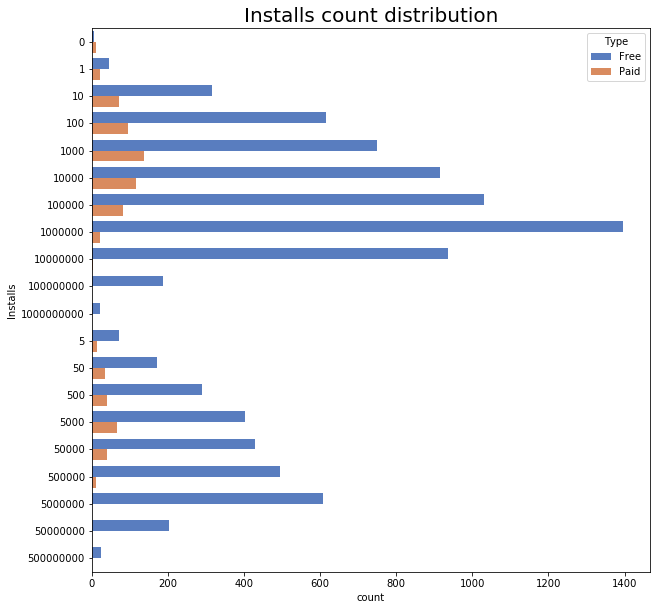

In [97]:
plt.figure(figsize=(10,10))
sns.countplot(y="Installs",data=android, palette = "muted", hue="Type")
plt.title('Installs count distribution',size = 20)

### Most of the apps in the dataframe have 1 million installs followed by 10 million and 100k.

In [98]:
android.Installs=android.Installs.astype(float)

In [99]:
android.Installs.dtype

dtype('float64')

### Installs vs Reviews

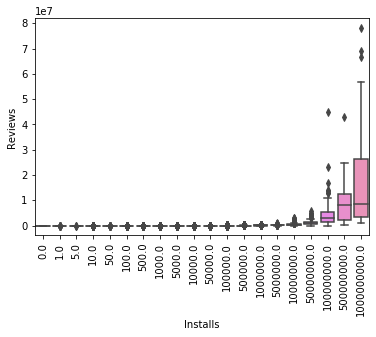

In [100]:
sns.boxplot('Installs','Reviews',data=android)
plt.xticks(rotation='vertical')
plt.show()

#### This plot definitely shows that increase in number of installations means more reviews which naturally makes sense because as the number of people using the app increases,  the reviews would also increase

In [101]:
inst =android[android.Installs>500000000.0].sort_values(by="Installs", ascending=False)
inst

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
152,152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,NaN,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018"
299,335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018"
2930,3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,NaN,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 6, 2018"
2908,3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,NaN,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 2, 2018"
2720,3454,Google Drive,PRODUCTIVITY,4.4,2731171.0,NaN,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018"
2507,3234,Google,TOOLS,4.4,8033493.0,NaN,1.000000e+09,Free,0.0,Everyone,Tools,"August 3, 2018"
2429,3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689.0,NaN,1.000000e+09,Free,0.0,Everyone,Travel & Local,"August 6, 2018"
2420,3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,NaN,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018"
2191,2808,Google Photos,PHOTOGRAPHY,4.5,10858556.0,NaN,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018"
2012,2554,Google+,SOCIAL,4.2,4831125.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 26, 2018"


#### We can see from above that the most installed aplications are also free, some have many reviews and are related to Google like: 

- Google Play Books, - Google Play Movies & TV, - Google Drive, - Google Street View, - Google Photos, - Google Play Games, - Google News

In [102]:
p =android[android.Installs>1000000.0][android.Type =="Paid"]
p

c:\users\omen\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
1743,2241,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018"
3208,4034,Hitman Sniper,GAME,4.6,408292.0,29000000.0,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018"


#### The 2 most installed Paid Apps are both games(Minecraft and Hitman:Sniper)
#### The majority of most installed free Apps lie in the Communication Category.
#### The majority of most installed Paid Apps lie in the Gaming Category.

In [103]:
pp = android[android.Installs>100000.0][android.Price>1].sort_values(by="Price", ascending=False)
pp

c:\users\omen\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
1743,2241,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018"
6370,7417,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26000000.0,1000000.0,Paid,6.99,Mature 17+,Action,"March 21, 2015"
2260,2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,48000000.0,1000000.0,Paid,5.99,Everyone,Photography,"July 25, 2018"
3274,4133,Weather Live,WEATHER,4.5,76593.0,NaN,500000.0,Paid,5.99,Everyone,Weather,"November 21, 2017"
4607,5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,872000.0,1000000.0,Paid,5.99,Everyone,Lifestyle,"June 27, 2018"
8034,9154,NBA JAM by EA SPORTS™,FAMILY,4.3,56444.0,43000000.0,500000.0,Paid,4.99,Everyone,Sports;Action & Adventure,"February 8, 2017"
7687,8804,DraStic DS Emulator,GAME,4.6,87766.0,12000000.0,1000000.0,Paid,4.99,Everyone,Action,"July 19, 2016"
689,853,Toca Life: City,EDUCATION,4.7,31085.0,24000000.0,500000.0,Paid,3.99,Everyone,Education;Pretend Play,"July 6, 2018"
7357,8449,Cameringo+ Filters Camera,PHOTOGRAPHY,4.6,28107.0,5.7,500000.0,Paid,2.99,Everyone,Photography,"June 11, 2018"
8786,9941,Tasker,TOOLS,4.6,43045.0,NaN,1000000.0,Paid,2.99,Everyone,Tools,"June 25, 2018"


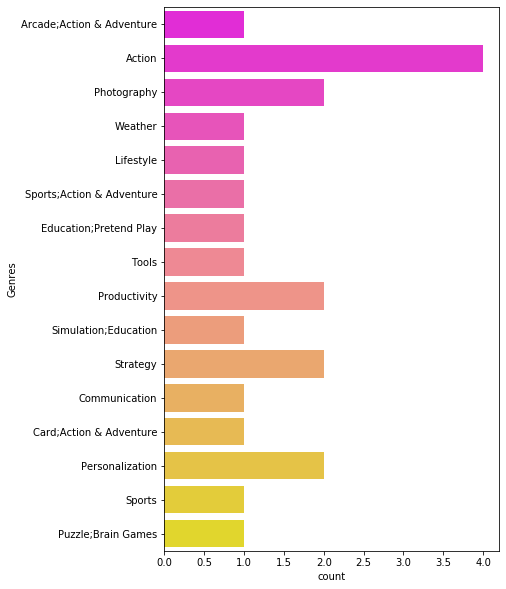

In [104]:
plt.figure(figsize=(6,10))
sns.countplot(y="Genres",data=pp, palette = "spring")

#### Top Genres for Paid Apps with more than 100000 of installs are Action, Photography, Productivity, Strategy, Personalization with price between 1.99 and 6.99. For apps with big price, number of installs gets smaller.

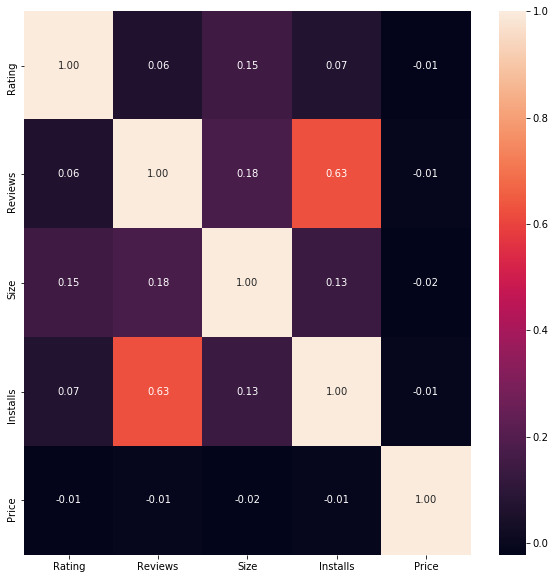

In [105]:
plt.figure(figsize=(10,10))
df=android[['Rating','Reviews','Size','Installs','Type','Price']]
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

#### Installs and Reviews seem very correlated also in our heatmap plot.

### Does price depend on the size of the app?


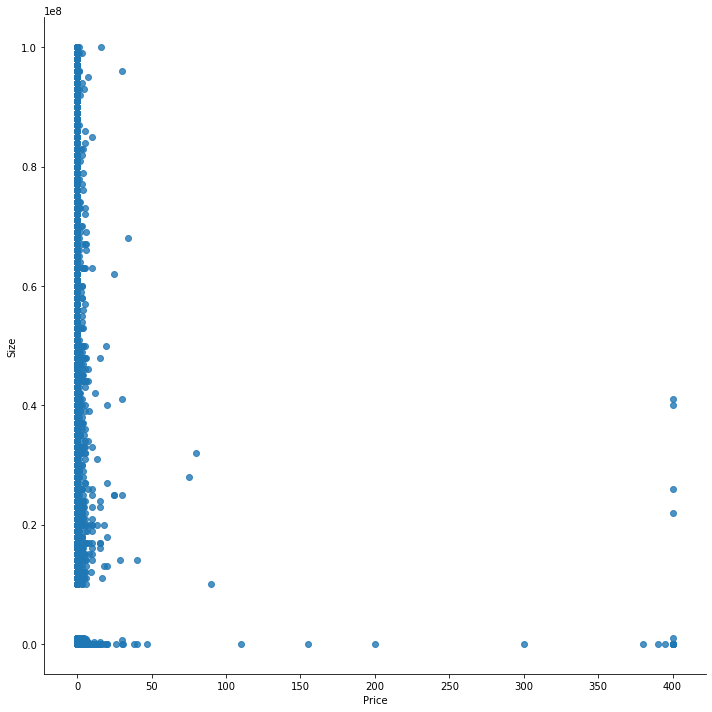

In [106]:
sns.lmplot(x='Price', y='Size', fit_reg=False, data=android,height=10)

#### Answer is NO

## Best Performing Apps


#### Let's select some of the best performing apps. For the selection, we need to set some criteria.

#### - Number of Installs should be equal to or greater than 1,000,000
#### - Average Rating of an app should be equal to or greater than 4.5
#### - Minimum number of Reviews should be 10,000

In [107]:
android.Reviews.mean()

216592.56382648306

In [108]:
df2 = android[(android.Installs >= 1000000.0)
           & (android.Rating >= 4.5)
           & (android.Reviews >=10000)][['App','Category','Rating','Size','Type','Installs']].sort_values('Installs', ascending=0)
df2

,App,Category,Rating,Size,Type,Installs
1356,Subway Surfers,GAME,4.5,76000000.0,Free,1.000000e+09
2003,Instagram,SOCIAL,4.5,NaN,Free,1.000000e+09
2191,Google Photos,PHOTOGRAPHY,4.5,NaN,Free,1.000000e+09
1410,My Talking Tom,GAME,4.5,NaN,Free,5.000000e+08
2946,MX Player,VIDEO_PLAYERS,4.5,NaN,Free,5.000000e+08
...,...,...,...,...,...,...
911,MetaTrader 5,FINANCE,4.5,NaN,Free,1.000000e+06
2577,Unit Converter,TOOLS,4.5,5.4,Free,1.000000e+06
4333,Weapon stripping 3D,FAMILY,4.6,24000000.0,Free,1.000000e+06
4251,Lyra Virtual Assistant,PRODUCTIVITY,4.5,3.4,Free,1.000000e+06


#### Best Performing Apps (Free)

In [109]:
df2_free = df2[(df2.Type == 'Free')][['App', 'Category']].head(10)
df2_free

,App,Category
1356,Subway Surfers,GAME
2003,Instagram,SOCIAL
2191,Google Photos,PHOTOGRAPHY
1410,My Talking Tom,GAME
2946,MX Player,VIDEO_PLAYERS
3181,Clean Master- Space Cleaner & Antivirus,TOOLS
2527,SHAREit - Transfer & Share,TOOLS
2716,Microsoft Word,PRODUCTIVITY
335,Google Duo - High Quality Video Calls,COMMUNICATION
342,UC Browser - Fast Download Private & Secure,COMMUNICATION


#### Best Performing Apps (Paid)

In [110]:
df2_paid = df2[(df2.Type == 'Paid')][['App', 'Category']].head(10)
df2_paid

,App,Category
1743,Minecraft,FAMILY
3208,Hitman Sniper,GAME
6308,Threema,COMMUNICATION
8538,Where's My Water?,FAMILY
8786,Tasker,TOOLS
7687,DraStic DS Emulator,GAME
8031,Lost Journey (Dreamsky),GAME
7743,Bloons TD 5,FAMILY
3375,Cut the Rope GOLD,FAMILY
4650,Five Nights at Freddy's,GAME


#### Top 10 Free Games

In [111]:
df2[(df2.Category == 'GAME')&(df2.Type == "Free")][['App']].head(10)

,App
1356,Subway Surfers
1410,My Talking Tom
3225,Smash Hit
3220,Bike Race Free - Top Motorcycle Racing Games
1396,Minion Rush: Despicable Me Official Game
1527,Shadow Fight 2
3214,Dr. Driving
1399,My Talking Angela
1517,Yes day
1522,Crossy Road


#### Top 10 Paid Games

In [112]:
df2[(df2.Category == 'GAME')&(df2.Type == "Paid")][['App']].head()

,App
3208,Hitman Sniper
7687,DraStic DS Emulator
8031,Lost Journey (Dreamsky)
4650,Five Nights at Freddy's


## Which Category has more likeable Apps?

#### I think an App which has large number of reviews , high rating on App store and large number of installs can be deemed to be likeable for any new user i.e any new user is more likely to like the App experience if these criteria are met.

Text(0.5, 1.0, 'CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE')

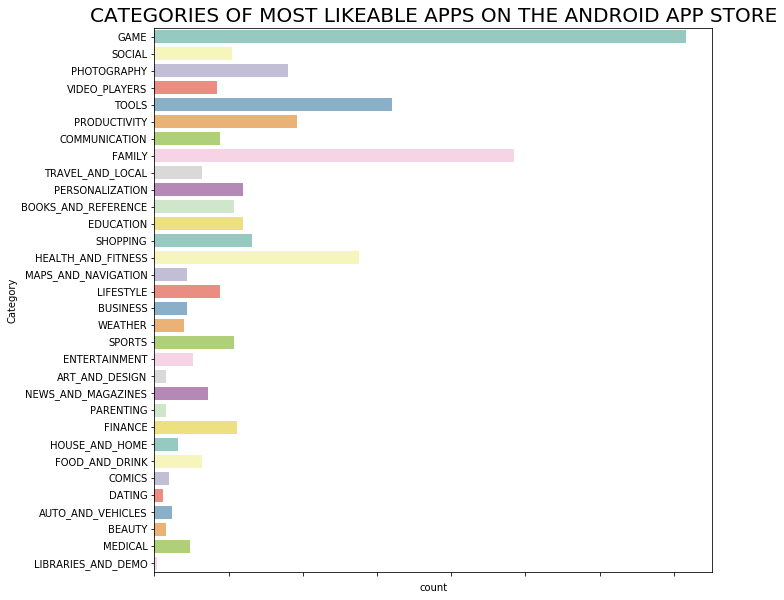

In [113]:
plt.figure(figsize=(10,10))
like = sns.countplot(y="Category",data=df2, palette = "Set3")
like.set_xticklabels(like.get_xticklabels(), rotation=90, ha="right")
like
plt.title('CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE',size = 20)

#### Gaming Apps outruns other categories by huge margin in the criteria of our most LIKEABLE category followed by Family and Tools

### Last Updated Column 

In [114]:
android["Last Updated"] =pd.to_datetime(android["Last Updated"])

In [115]:
android["Last Updated"].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [116]:
android["Year"] = android["Last Updated"].dt.year

In [117]:
android["Month"] = android["Last Updated"].dt.month

In [118]:
android.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,2018,1
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2018,1
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,2018,8
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,2018,6
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,2018,6


In [119]:
android.Year.value_counts()

2018    6284
2017    1794
2016     779
2015     449
2014     203
2013     108
2012      26
2011      15
2010       1
Name: Year, dtype: int64

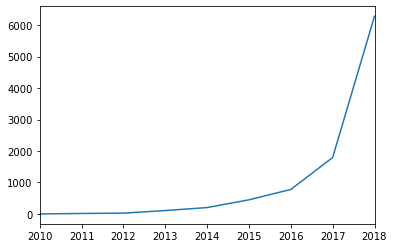

In [120]:
android.Year.value_counts().plot()

#### The graph above shows an increasing purchaises year by year till 2018. Let's analyze months in 2018.

In [121]:
dfd = (android['Last Updated'] >= '2018-01-01') & (android['Last Updated']<= '2018-08-08')
dfd2 =android.loc[dfd].sort_values(by="Last Updated")
dfd2

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month
5065,6059,Millionaire Quiz Free: Be Rich,FAMILY,3.8,66033.0,6.8,10000000.0,Free,0.00,Everyone,Casual,2018-01-01,2018,1
3352,4226,How Old am I?,FAMILY,2.8,4635.0,3.9,1000000.0,Free,0.00,Everyone,Entertainment,2018-01-01,2018,1
6909,7971,Job CV Maker & Portfolio Maker,FAMILY,4.2,593.0,4.9,100000.0,Free,0.00,Everyone,Education,2018-01-01,2018,1
7597,8705,DP Display Pictures Life Quotes Motivational GM,SOCIAL,4.4,39.0,11000000.0,5000.0,Free,0.00,Everyone,Social,2018-01-01,2018,1
7685,8802,Dr. Shogi,GAME,3.3,19291.0,5.1,1000000.0,Free,0.00,Everyone,Board,2018-01-02,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9579,10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.4,1000.0,Paid,7.99,Everyone,Health & Fitness,2018-08-08,2018,8
9040,10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434.0,3.6,50000.0,Free,0.00,Everyone,Tools,2018-08-08,2018,8
9535,10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392.0,NaN,1000000.0,Free,0.00,Everyone,Shopping,2018-08-08,2018,8
9236,10408,Shoot Hunter-Gun Killer,GAME,4.3,320334.0,27000000.0,50000000.0,Free,0.00,Teen,Action,2018-08-08,2018,8


In [122]:
android.Month.value_counts()

7     2612
8     1285
6     1170
5      927
3      640
4      575
2      517
1      469
12     416
10     380
11     362
9      306
Name: Month, dtype: int64

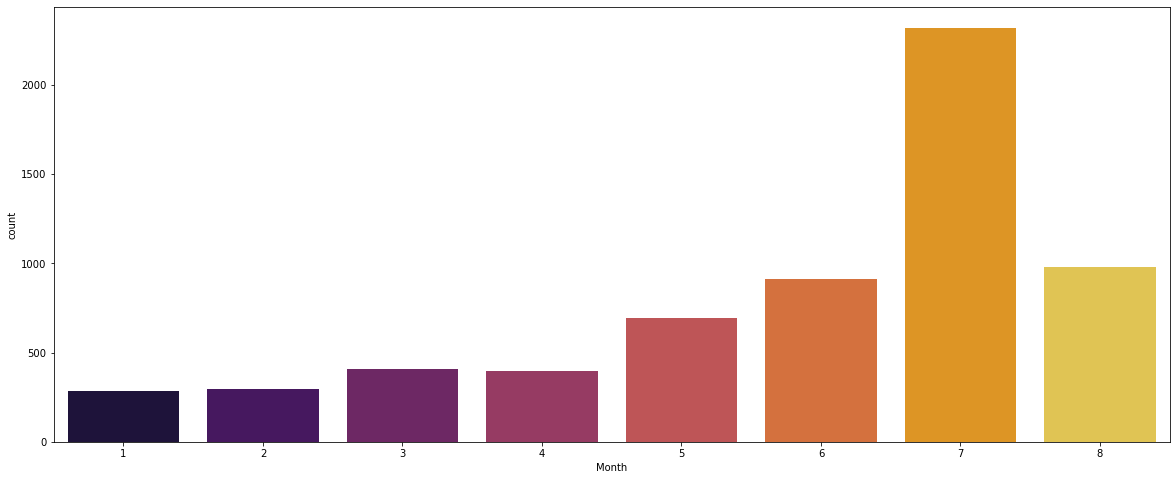

In [123]:
plt.figure(figsize = (20,8))
sns.countplot(x="Month",data=dfd2, palette = "inferno")

#### We can observe that July 2018 was the busiest month for buying apps, being also a period for hollydays when people tend to order more for family and fun.

In [124]:
july = dfd2[dfd2.Month == 7]
july

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month
6470,7520,Postings (Craigslist Search App),SHOPPING,4.3,151095.0,12000000.0,5000000.0,Free,0.0,Mature 17+,Shopping,2018-07-01,2018,7
8362,9487,3D Metal Piano Keys Keyboard Theme,FOOD_AND_DRINK,4.4,467.0,7.3,100000.0,Free,0.0,Everyone,Food & Drink,2018-07-01,2018,7
1269,1557,Mama Lala 's song,LIBRARIES_AND_DEMO,0.0,102.0,21000000.0,50000.0,Free,0.0,Everyone,Libraries & Demo,2018-07-01,2018,7
3811,4737,Zaatar w Zeit,FOOD_AND_DRINK,4.4,205.0,33000000.0,50000.0,Free,0.0,Everyone,Food & Drink,2018-07-01,2018,7
7278,8363,DG - Digital Coupons - Free Coupon and Discount,SHOPPING,3.6,38.0,1.1,10000.0,Free,0.0,Everyone,Shopping,2018-07-01,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,10299,FD CANNECT,TOOLS,0.0,1.0,75000000.0,1.0,Free,0.0,Everyone,Tools,2018-07-31,2018,7
6849,7909,BayPort CU Mobile Banking,FINANCE,4.7,2374.0,16000000.0,10000.0,Free,0.0,Everyone,Finance,2018-07-31,2018,7
172,172,Ancestry,BOOKS_AND_REFERENCE,4.3,64513.0,NaN,5000000.0,Free,0.0,Everyone,Books & Reference,2018-07-31,2018,7
7507,8602,DN Diamonds,BUSINESS,0.0,4.0,10000000.0,100.0,Free,0.0,Everyone,Business,2018-07-31,2018,7


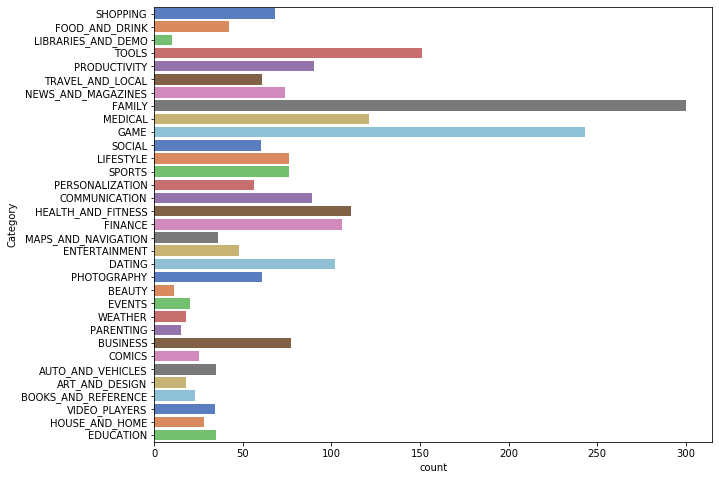

In [125]:
plt.figure(figsize = (10,8))
sns.countplot(y="Category",data=july, palette = "muted")

#### As expected in July 2018 the most wanted apps were from categories like Family, Game, Tools and Medical.

### VISUALIZATION WITH PLOTY AND IPLOT

In [126]:
fig = {
  "data": [
    {
      "values": android.Category.value_counts().values,
      "labels": android.Category.value_counts().index,
      "type": "pie"
    }],
  "layout": {
        "title":"Percentages of Categories in PlayStore"
    }
}
iplot(fig)

In [127]:
rev1 = pd.pivot_table(rev, values ="Reviews", index="App", aggfunc='sum').sort_values(by="Reviews", ascending=False)
rev1

,Reviews
App,
Facebook,78158306.0
WhatsApp Messenger,69119316.0
Instagram,66577313.0
Messenger – Text and Video Chat for Free,56642847.0
Clash of Clans,44891723.0
Clean Master- Space Cleaner & Antivirus,42916526.0
Subway Surfers,27722264.0
YouTube,25655305.0
"Security Master - Antivirus, VPN, AppLock, Booster",24900999.0


In [128]:
data =[go.Bar(
    x=rev1.index, y=rev1.Reviews, name="Apps with hight number of Reviews"
)]

layout=go.Layout(title="Apps with hight number of Reviews")
fig=go.Figure(data=data, layout=layout)
pyo.plot(fig, filename="Apps with max Reviews.png.html")

'Apps with max Reviews.png.html'

In [129]:
data = [go.Bar(x=rev1.index,
               y=rev1.Reviews, name="Apps with hight number of Reviews")]
layout = {"title": "Apps with hight number of Reviews"}

pyo.iplot({"data": data, "layout": layout})

#### Reviews vs.Rating

In [130]:
data=[go.Scatter(x=android.Reviews, y=android.Rating, mode='markers', marker=dict(size=5, color='rgb(138,43,226)'))]
layout =go.Layout(title='Reviews vs.Rating', xaxis=dict(title="Reviews"), yaxis=dict(title="Rating"))
figure=go.Figure(data=data, layout=layout)
pyo.plot(figure)

'temp-plot.html'

In [131]:
trace1 = dict(type='scatter', x=android.Reviews, y=android.Rating, mode='markers', marker=dict(size=5, color='rgb(138,43,226)'), name='android.Rating')
data = [trace1]
layout = {"title": "Reviews vs.Rating"}

pyo.iplot({"data": trace1, "layout": layout})

In [132]:
fig = {
    "data": [{
        "type": 'violin',
        "y": android.Rating,
        "box": {
            "visible": True
        },
        "line": {
            "color": 'red'
        },
        "box": {
                "visible": True
        },
        "meanline": {
                "visible": True
        },
        "x0": 'Rating'
    }],
    "layout" : {
        "title": "Violin & Box Plots of Rating",
        "yaxis": {
            "zeroline": False,
        }
    }
}
iplot(fig)

In [133]:
df3=pd.DataFrame(android.Rating.value_counts().sort_values(ascending=False))
df3.head()

,Rating
0.0,1463
4.3,897
4.4,895
4.5,848
4.2,810


In [134]:
df3.iplot(kind='barh',barmode='stack',bargap=.1)

In [135]:

df3.iplot(kind='bar', title="Rating Distribution", colors='crimson', xTitle="Rating", yTitle="Count")

#### Rating vs.Price

In [136]:
android[["Rating", "Price"]].iplot(kind="scatter",x="Rating", y="Price",
                                   yTitle='Price',xTitle="Rating", title='Rating vs.Price', mode='markers',
                                   size=7, color="red")

#### Content Rating

In [137]:
df4 = pd.crosstab(index=android["Category"],columns=android["Content Rating"])
df4 = df4[["Everyone", "Everyone 10+", "Teen", "Mature 17+", "Adults only 18+", "Unrated"]]
df4.head()

Content Rating,Everyone,Everyone 10+,Teen,Mature 17+,Adults only 18+,Unrated
Category,,,,,,
ART_AND_DESIGN,60,1,3,0,0,0
AUTO_AND_VEHICLES,83,1,1,0,0,0
BEAUTY,45,2,3,3,0,0
BOOKS_AND_REFERENCE,198,4,17,3,0,0
BUSINESS,405,1,13,1,0,0


In [138]:
df4.iplot(kind='barh', barmode='stack', bargap=.1, title="Content Rating in every Category", colors=["green", "yellow", "maroon", "crimson" , 
                                                           "blue", "black"])

In [139]:
fig = {
  "data": [
    {
      "values": android["Content Rating"].value_counts().values,
      "labels": android["Content Rating"].value_counts().index,
      "type": "pie"
    }],
  "layout": {
        "title":"Percentages of Content Rating in PlayStore"
    }
}
iplot(fig)

In [140]:
df5= pd.DataFrame(dfd2.Month.value_counts().sort_values(ascending=False))
df5.sort_index(axis=0)

,Month
1,286
2,296
3,407
4,394
5,691
6,913
7,2320
8,977


In [141]:
df5.iplot(kind="bar", title="Number of apps purchased in every month of 2018", colors="navy")